<b>Fichiers utilisés :</b>
 <ul>
    <li>`diabete_population.csv : recense les données médicales d'un remier groupe de femmes (âgées de plus de 21) : pression artérielle, l'indice de mass corporelle (IMC), l'âge, etc.`</li>
<li>`diabete_patients.csv : recense le même type de données médicales pour un second groupe de femmes qui servira à vérifier la fiabilité du test de "prédiction"`</li>
</ul> 
Plus précisément, chaque ligne de ces fichiers renseigne les paramètres médicaux d"une femme indienne:
<ul>
    <li>grossesses : nombre de grossesses</li>
    <li>glucose : concentration plasmatique de glucose  à 2 heures dans un test de tolérance au glucose par voie orale </li>
    <li>pression : pression artérielle diastolique (mm Hg)</li>
    <li>insuline : insuline sérique 2 heures (mu U / ml)</li>
    <li>imc : indice de masse corporel (poids(kg)/hauteur(m))</li>
    <li>K : coeiffecient lié à la présence du diabète parmi ses parents et proches</li>
    <li>age :âge</li>
    <li>M : vaut 1 si elle est diabètique et 0 si non</li>
 </ul>  
 1)Calculer la moyenne et l'écart type de chaque colonne (sauf M)
 
 
 2)Dans la même figure, représenter par une boite à moustache chaque colonne autre que M.
 
 
 3)L'insuline t le glucose ont-elles des dispersions comparables?
 
 
 4)Pour normaliser chaque colonne, exécuter le code suivant:
 data_norm=(data[colonne]-moyenne)/ecart_type
 
 
 5)Parmi les individus 0,1,2,3 et 4 lesquels ont un age supérieur à la moyenne?
 
 
 6)représenter la boite à moustaches de chaque colonne colonne de data_norm
 
 
 7)quel est l'interet de normaliser chaque colonne?
 
 
 8)Normaliser les colonnes de diabete_patients.csv
 
 
 9)A partir des trois colonnes insuline, glucose et pression, céer le nuage de points des individus dans l'espace muni d'un repère orthonormé. Chaque individu est représent  par unpoint M(x, y,z). M sera de couleur grise s'il est malade et bleue si non. 
 
 
 10)A partir des trois colonnes insuline, grossesse , age céerle nuage de points des individus dans l'espace muni d'un repère orthonormé. Chaque individu est représent  par unpoint M(x, y,z). M sera de couleur grise s'il est malade et bleue si non. 
 
 
 11) Entre les deux représentations laquelle permet de mieux distinguer entre le nuage bleue de nuage gris?
 
 
 12)Considérons un nouve individu, dans chaque représentation (1 et 2), les paramètres de normalisés de cet individu consitueron les coordonnées d'un point.
 
 On observant ses 11 plus proches voisins, on souhaite prédire  si l'individu est malade ou pas
 <ul>
    <li>Si la majorité de ses voisins est malade, alors on prédirera qu'il est malade
    <li>Si la majorité de ses voisins est non malade alors on prédirera qu'il n'estpas malade.
    </ul>
    
    Parmi les deux représenation laquelle favorise au mieux la prédiction?

1)Calculer la moyenne et l'écart type de chaque colonne (sauf M)

In [134]:
import pandas as pd 
diab_pop=pd.read_csv('diabete_population.csv')
diab_pat=pd.read_csv('diabete_patients.csv')
diab_pop.head()

,grossesses,glucose,pression,insuline,imc,K,age,M
0,2,104,75,28,39.020106,0.145273,35,1
1,10,121,64,517,30.672607,0.154211,43,1
2,2,153,59,87,26.295668,1.029407,22,1
3,9,145,47,226,46.077807,0.086713,37,1
4,3,102,76,315,28.335339,0.109751,21,1


In [135]:
parametres=[c for c in diab_pop.columns if c!= 'M']
parametres

['grossesses', 'glucose', 'pression', 'insuline', 'imc', 'K', 'age']

In [136]:
moy=diab_pop[parametres].mean()
moy

grossesses      3.820000
glucose       107.422500
pression       72.152500
insuline      155.992500
imc            31.853995
K               0.427129
age            30.780000
dtype: float64

In [137]:
sig=diab_pop[parametres].std()
sig

grossesses      3.526854
glucose        31.304535
pression       16.420210
insuline      140.449859
imc             9.642392
K               0.425077
age            12.612863
dtype: float64

2)Dans la même figure, représenter par une boite à moustache chaque colonne autre que M

<AxesSubplot:>

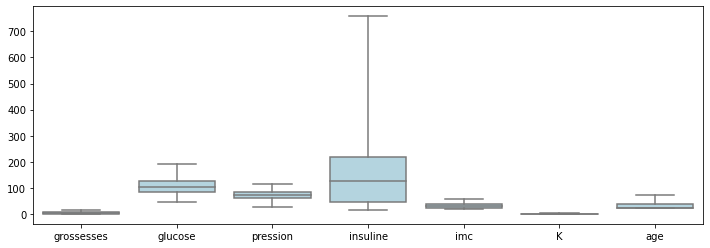

In [138]:
from seaborn import boxplot
from matplotlib import pyplot as plt
plt.figure(figsize=(12,4)) 
boxplot(data=diab_pop[parametres], color='lightblue', whis=[0,100])

3)L'insuline t le glucose ont-elles des dispersions comparables?
L'insuline et le glucose n'ont pas le même ordre de grandeur

 4)Pour normaliser chaque colonne, exécuter le code suivant:
 data_norm=(data[colonne]-moyenne)/ecart_type

In [139]:
tn=(diab_pop[parametres]-moy)/sig
tn

,grossesses,glucose,pression,insuline,imc,K,age
0,-0.516041,-0.109329,0.173414,-0.911304,0.743188,-0.663069,0.334579
1,1.752270,0.433723,-0.496492,2.570366,-0.122520,-0.642042,0.968852
2,-0.516041,1.455939,-0.800995,-0.491225,-0.576447,1.416869,-0.696115
3,1.468731,1.200385,-1.531801,0.498452,1.475133,-0.800832,0.493147
4,-0.232502,-0.173218,0.234315,1.132130,-0.364915,-0.746634,-0.775399
...,...,...,...,...,...,...,...
395,0.051037,-1.003768,-0.922796,-0.790264,-1.210104,0.315929,-0.696115
396,-0.799580,-1.163490,-1.105497,-0.932664,-1.078406,-0.583855,-0.696115
397,-0.799580,0.401779,0.538818,0.235013,-1.210369,-0.670262,-0.696115
398,-0.799580,-0.939880,-0.374691,-0.120986,-1.090458,-0.682149,-0.458262


5)Parmi les individus 0,1,2,3 et 4 lesquels ont un age supérieur à la moyenne?

les individus 0,1,3 ont un age normalisé positif, cela signifie qu'ils ont un age supérieur à la moyenn

6)représenter la boite à moustaches de chaque colonne colonne de data_norm

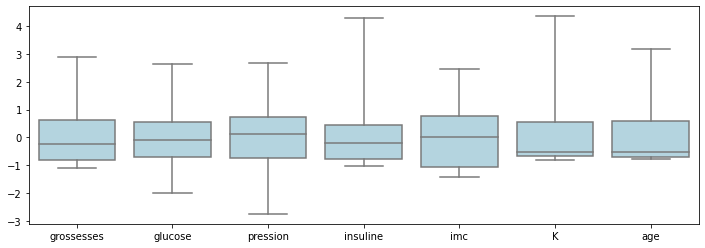

In [140]:
plt.figure(figsize=(12,4)) 
boxplot(data=tn[parametres], color='lightblue', whis=[0,100])
plt.show()

7)quel est l'interet de normaliser chaque colonne?
quelqe soit la variable sa valeur (en valeur absolue) est inférieur à 4.
La normalisation permet d'avoir le même ordre de grandeur pour comparer entre les variables


8)Normaliser les colonnes de diabete_patients.csv

In [141]:
pn=(diab_pat[parametres]-moy)/sig
pn

,grossesses,glucose,pression,insuline,imc,K,age
0,1.185192,-0.013496,-0.252890,0.128213,-0.705758,-0.710584,-0.696115
1,-1.083118,-1.131545,0.721519,0.690691,-0.231370,0.964289,1.048136
2,-0.516041,2.094824,0.051613,3.239644,-0.076123,1.582590,2.316683
3,-0.232502,-0.045441,0.112514,0.341812,-0.499606,-0.767300,-0.775399
4,1.468731,0.912887,-0.618293,-0.007067,0.651361,0.172326,-0.696115
...,...,...,...,...,...,...,...
95,0.618115,-0.556549,0.904221,-0.790264,-1.066785,-0.749308,-0.616831
96,-0.799580,2.158713,0.782420,-0.918424,-1.377615,0.171955,0.334579
97,-0.799580,-1.003768,0.477917,0.206533,1.425748,-0.390862,-0.775399
98,-1.083118,1.967047,0.051613,0.591012,-1.083417,-0.605248,-0.378978


9)A partir des trois colonnes insuline, glucose et pression, céer le nuage de points des individus dans l'espace muni d'un repère orthonormé. Chaque individu est représent par unpoint M(x, y,z). M sera de couleur grise s'il est malade et bleue si non.

In [142]:
#ajout de M à tn
tn['M']=diab_pop['M']
tn

,grossesses,glucose,pression,insuline,imc,K,age,M
0,-0.516041,-0.109329,0.173414,-0.911304,0.743188,-0.663069,0.334579,1
1,1.752270,0.433723,-0.496492,2.570366,-0.122520,-0.642042,0.968852,1
2,-0.516041,1.455939,-0.800995,-0.491225,-0.576447,1.416869,-0.696115,1
3,1.468731,1.200385,-1.531801,0.498452,1.475133,-0.800832,0.493147,1
4,-0.232502,-0.173218,0.234315,1.132130,-0.364915,-0.746634,-0.775399,1
...,...,...,...,...,...,...,...,...
395,0.051037,-1.003768,-0.922796,-0.790264,-1.210104,0.315929,-0.696115,0
396,-0.799580,-1.163490,-1.105497,-0.932664,-1.078406,-0.583855,-0.696115,0
397,-0.799580,0.401779,0.538818,0.235013,-1.210369,-0.670262,-0.696115,0
398,-0.799580,-0.939880,-0.374691,-0.120986,-1.090458,-0.682149,-0.458262,0


In [143]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [144]:
import plotly.express as px
fig=px.scatter_3d(data_frame=tn, x='insuline', y='glucose', z='pression', color=tn['M'].astype(str), color_discrete_map={'1':'gray', '0':'blue'})
fig.show()

10)A partir des trois colonnes insuline, grossesse , age céerle nuage de points des individus dans l'espace muni d'un repère orthonormé. Chaque individu est représent par unpoint M(x, y,z). M sera de couleur grise s'il est malade et bleue si non

In [145]:
fig=px.scatter_3d(data_frame=tn, x='insuline', y='grossesses', z='age', color=tn['M'].astype(str), color_discrete_map={'1':'gray', '0':'blue'})
fig.show()

11) Entre les deux représentations laquelle permet de mieux distinguer entre le nuage bleue de nuage gris?
La représentation numéro 2 est plus favorable pour distinguer entre le nuage de points des malades avec celui des non malades

12)distance entre patient 0 et les autres

In [146]:
par=['grossesses', 'insuline', 'age']
#distance entre deux individus
def distance(i, p):
    l1=tn[par].loc[i]
    l2=pn[par].loc[p]
    diff=(l1-l2)**2
    return diff.sum()**0.5
tn['d']=[distance(i, 0) for i in range(400)]
tn


,grossesses,glucose,pression,insuline,imc,K,age,M,d
0,-0.516041,-0.109329,0.173414,-0.911304,0.743188,-0.663069,0.334579,1,2.244353
1,1.752270,0.433723,-0.496492,2.570366,-0.122520,-0.642042,0.968852,1,3.009618
2,-0.516041,1.455939,-0.800995,-0.491225,-0.576447,1.416869,-0.696115,1,1.810496
3,1.468731,1.200385,-1.531801,0.498452,1.475133,-0.800832,0.493147,1,1.277425
4,-0.232502,-0.173218,0.234315,1.132130,-0.364915,-0.746634,-0.775399,1,1.738963
...,...,...,...,...,...,...,...,...,...
395,0.051037,-1.003768,-0.922796,-0.790264,-1.210104,0.315929,-0.696115,0,1.459421
396,-0.799580,-1.163490,-1.105497,-0.932664,-1.078406,-0.583855,-0.696115,0,2.250506
397,-0.799580,0.401779,0.538818,0.235013,-1.210369,-0.670262,-0.696115,0,1.987643
398,-0.799580,-0.939880,-0.374691,-0.120986,-1.090458,-0.682149,-0.458262,0,2.014446


In [147]:
tn.sort_values('d').head(11).M.sum()

7

In [148]:
#le patient 0 est malade

In [149]:
#fonction prediction
def prediction(p):
    tn['d']=[distance(i, p) for i in range(400)]
    nb_malade=tn.sort_values('d').head(11).M.sum()
    if nb_malade>5:
        return 1
    else: return 0
prediction(0)    

1

In [150]:
#prediction sur le fichier des patients
pn['M']=diab_pat['M']
pn

,grossesses,glucose,pression,insuline,imc,K,age,M
0,1.185192,-0.013496,-0.252890,0.128213,-0.705758,-0.710584,-0.696115,1
1,-1.083118,-1.131545,0.721519,0.690691,-0.231370,0.964289,1.048136,1
2,-0.516041,2.094824,0.051613,3.239644,-0.076123,1.582590,2.316683,1
3,-0.232502,-0.045441,0.112514,0.341812,-0.499606,-0.767300,-0.775399,1
4,1.468731,0.912887,-0.618293,-0.007067,0.651361,0.172326,-0.696115,1
...,...,...,...,...,...,...,...,...
95,0.618115,-0.556549,0.904221,-0.790264,-1.066785,-0.749308,-0.616831,0
96,-0.799580,2.158713,0.782420,-0.918424,-1.377615,0.171955,0.334579,0
97,-0.799580,-1.003768,0.477917,0.206533,1.425748,-0.390862,-0.775399,0
98,-1.083118,1.967047,0.051613,0.591012,-1.083417,-0.605248,-0.378978,0


In [151]:
pn['t']=[prediction(p) for p in range(100)]
pn

,grossesses,glucose,pression,insuline,imc,K,age,M,t
0,1.185192,-0.013496,-0.252890,0.128213,-0.705758,-0.710584,-0.696115,1,1
1,-1.083118,-1.131545,0.721519,0.690691,-0.231370,0.964289,1.048136,1,1
2,-0.516041,2.094824,0.051613,3.239644,-0.076123,1.582590,2.316683,1,1
3,-0.232502,-0.045441,0.112514,0.341812,-0.499606,-0.767300,-0.775399,1,1
4,1.468731,0.912887,-0.618293,-0.007067,0.651361,0.172326,-0.696115,1,1
...,...,...,...,...,...,...,...,...,...
95,0.618115,-0.556549,0.904221,-0.790264,-1.066785,-0.749308,-0.616831,0,0
96,-0.799580,2.158713,0.782420,-0.918424,-1.377615,0.171955,0.334579,0,0
97,-0.799580,-1.003768,0.477917,0.206533,1.425748,-0.390862,-0.775399,0,0
98,-1.083118,1.967047,0.051613,0.591012,-1.083417,-0.605248,-0.378978,0,0


In [152]:
#Mesure de fiabilité (question bonus)
e=pd.crosstab(pn['M'], pn['t'], margins=True)
e

t,0,1,All
M,,,
0,44,6,50
1,9,41,50
All,53,47,100


In [153]:
#précision du test
prec=(e.loc[0,0]+e.loc[1,1])/100


In [154]:
print(prec)

0.85


In [155]:
target = diab_pop['M']
diab_pop = diab_pop.drop(columns=['M'])

In [156]:
diab_pop['age'].min()

21

In [157]:
diab_pat

,grossesses,glucose,pression,insuline,imc,K,age,M
0,8,107,68,174,25.048805,0.125076,22,1
1,0,72,84,253,29.623036,0.837026,44,1
2,2,173,73,611,31.119992,1.099852,60,1
3,3,106,74,204,27.036600,0.100967,21,1
4,9,136,62,155,38.134675,0.500380,22,1
...,...,...,...,...,...,...,...,...
95,6,90,87,45,21.567639,0.108615,23,0
96,1,175,85,27,18.570494,0.500223,35,0
97,1,76,80,185,45.601613,0.260982,21,0
98,0,169,73,239,21.407266,0.169851,26,0


In [158]:
pn

,grossesses,glucose,pression,insuline,imc,K,age,M,t
0,1.185192,-0.013496,-0.252890,0.128213,-0.705758,-0.710584,-0.696115,1,1
1,-1.083118,-1.131545,0.721519,0.690691,-0.231370,0.964289,1.048136,1,1
2,-0.516041,2.094824,0.051613,3.239644,-0.076123,1.582590,2.316683,1,1
3,-0.232502,-0.045441,0.112514,0.341812,-0.499606,-0.767300,-0.775399,1,1
4,1.468731,0.912887,-0.618293,-0.007067,0.651361,0.172326,-0.696115,1,1
...,...,...,...,...,...,...,...,...,...
95,0.618115,-0.556549,0.904221,-0.790264,-1.066785,-0.749308,-0.616831,0,0
96,-0.799580,2.158713,0.782420,-0.918424,-1.377615,0.171955,0.334579,0,0
97,-0.799580,-1.003768,0.477917,0.206533,1.425748,-0.390862,-0.775399,0,0
98,-1.083118,1.967047,0.051613,0.591012,-1.083417,-0.605248,-0.378978,0,0


In [159]:
#création des modèles 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(tn[['grossesses', 'age', 'insuline']], target)


KNeighborsClassifier()

In [160]:
pn['predicted_value'] = knn.predict(pn[['grossesses', 'age', 'insuline']])

In [161]:
pn

,grossesses,glucose,pression,insuline,imc,K,age,M,t,predicted_value
0,1.185192,-0.013496,-0.252890,0.128213,-0.705758,-0.710584,-0.696115,1,1,1
1,-1.083118,-1.131545,0.721519,0.690691,-0.231370,0.964289,1.048136,1,1,1
2,-0.516041,2.094824,0.051613,3.239644,-0.076123,1.582590,2.316683,1,1,1
3,-0.232502,-0.045441,0.112514,0.341812,-0.499606,-0.767300,-0.775399,1,1,1
4,1.468731,0.912887,-0.618293,-0.007067,0.651361,0.172326,-0.696115,1,1,0
...,...,...,...,...,...,...,...,...,...,...
95,0.618115,-0.556549,0.904221,-0.790264,-1.066785,-0.749308,-0.616831,0,0,0
96,-0.799580,2.158713,0.782420,-0.918424,-1.377615,0.171955,0.334579,0,0,0
97,-0.799580,-1.003768,0.477917,0.206533,1.425748,-0.390862,-0.775399,0,0,0
98,-1.083118,1.967047,0.051613,0.591012,-1.083417,-0.605248,-0.378978,0,0,0


In [162]:
# La seralisation permet l'enregistrement du fichier
import pickle
file = open("diabetes_prediction.pkl", "wb")
pickle.dump(knn, file)
file.close()

+ Les differentes étapes de l'exploitation des modéles dans une application web :

    + La seralisation avec l'enregistrement du fichier au format pkl via la package pickle
    + Lancer anaconda powershell prompt
    + pip install streamlit
    + Creation d'un fichier app.py
    + Exécuter un code 
    + retounner sur anconda, chercher votre dossier via la commande cd et copier puis exécuter streamlit run .\app.py
    + Normaliser les variables features
    + Lancer votre page en entrant les valeures puis excécuter avec le boutton predict
    + Utiliser un slider à la place d'un input_number

In [163]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rand_fo = RandomForestClassifier()
rand_fo.fit(tn[['grossesses', 'age', 'insuline']], target)

RandomForestClassifier()

In [164]:
df_forest = pn.iloc[:,0:-1].copy()
df_forest['predicted_value_rand_fo'] = rand_fo.predict(df_forest[['grossesses', 'age', 'insuline']])

In [165]:
df_forest

,grossesses,glucose,pression,insuline,imc,K,age,M,t,predicted_value_rand_fo
0,1.185192,-0.013496,-0.252890,0.128213,-0.705758,-0.710584,-0.696115,1,1,1
1,-1.083118,-1.131545,0.721519,0.690691,-0.231370,0.964289,1.048136,1,1,0
2,-0.516041,2.094824,0.051613,3.239644,-0.076123,1.582590,2.316683,1,1,1
3,-0.232502,-0.045441,0.112514,0.341812,-0.499606,-0.767300,-0.775399,1,1,1
4,1.468731,0.912887,-0.618293,-0.007067,0.651361,0.172326,-0.696115,1,1,1
...,...,...,...,...,...,...,...,...,...,...
95,0.618115,-0.556549,0.904221,-0.790264,-1.066785,-0.749308,-0.616831,0,0,0
96,-0.799580,2.158713,0.782420,-0.918424,-1.377615,0.171955,0.334579,0,0,0
97,-0.799580,-1.003768,0.477917,0.206533,1.425748,-0.390862,-0.775399,0,0,0
98,-1.083118,1.967047,0.051613,0.591012,-1.083417,-0.605248,-0.378978,0,0,0


In [173]:
import pickle
file = open("diabetes_prediction_forest.pkl", "wb")
pickle.dump(knn, file)
file.close()

In [166]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(tn[['grossesses', 'age', 'insuline']], target)

LogisticRegression()

In [167]:
df_log = pn.iloc[:,0:-1].copy()
df_log['predicted_value_logreg'] = log.predict(df_log[['grossesses', 'age', 'insuline']])

In [168]:
df_log

,grossesses,glucose,pression,insuline,imc,K,age,M,t,predicted_value_logreg
0,1.185192,-0.013496,-0.252890,0.128213,-0.705758,-0.710584,-0.696115,1,1,1
1,-1.083118,-1.131545,0.721519,0.690691,-0.231370,0.964289,1.048136,1,1,1
2,-0.516041,2.094824,0.051613,3.239644,-0.076123,1.582590,2.316683,1,1,1
3,-0.232502,-0.045441,0.112514,0.341812,-0.499606,-0.767300,-0.775399,1,1,0
4,1.468731,0.912887,-0.618293,-0.007067,0.651361,0.172326,-0.696115,1,1,1
...,...,...,...,...,...,...,...,...,...,...
95,0.618115,-0.556549,0.904221,-0.790264,-1.066785,-0.749308,-0.616831,0,0,0
96,-0.799580,2.158713,0.782420,-0.918424,-1.377615,0.171955,0.334579,0,0,0
97,-0.799580,-1.003768,0.477917,0.206533,1.425748,-0.390862,-0.775399,0,0,0
98,-1.083118,1.967047,0.051613,0.591012,-1.083417,-0.605248,-0.378978,0,0,0


In [172]:
import pickle
file = open("diabetes_prediction_logreg.pkl", "wb")
pickle.dump(knn, file)
file.close()

In [169]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(tn[['grossesses', 'age', 'insuline']], target)

DecisionTreeClassifier()

In [170]:
df_tree = pn.iloc[:,0:-1].copy()
df_tree['predicted_value_tree'] = tree.predict(df_tree[['grossesses', 'age', 'insuline']])

In [171]:
df_tree

,grossesses,glucose,pression,insuline,imc,K,age,M,t,predicted_value_tree
0,1.185192,-0.013496,-0.252890,0.128213,-0.705758,-0.710584,-0.696115,1,1,0
1,-1.083118,-1.131545,0.721519,0.690691,-0.231370,0.964289,1.048136,1,1,0
2,-0.516041,2.094824,0.051613,3.239644,-0.076123,1.582590,2.316683,1,1,1
3,-0.232502,-0.045441,0.112514,0.341812,-0.499606,-0.767300,-0.775399,1,1,1
4,1.468731,0.912887,-0.618293,-0.007067,0.651361,0.172326,-0.696115,1,1,1
...,...,...,...,...,...,...,...,...,...,...
95,0.618115,-0.556549,0.904221,-0.790264,-1.066785,-0.749308,-0.616831,0,0,0
96,-0.799580,2.158713,0.782420,-0.918424,-1.377615,0.171955,0.334579,0,0,0
97,-0.799580,-1.003768,0.477917,0.206533,1.425748,-0.390862,-0.775399,0,0,0
98,-1.083118,1.967047,0.051613,0.591012,-1.083417,-0.605248,-0.378978,0,0,0


In [174]:
import pickle
file = open("diabetes_prediction_tree.pkl", "wb")
pickle.dump(knn, file)
file.close()

+ Les étapes du deploiment du modèle:
    
        + Créer un compte sur HEROKU
        + le nom de l'application source doit porter le nom de app.py
        + installer visual studio code
        + installer heroku clt 64-bit installer
        + Après l'installation de heroku, il faut fermer vs code et rouvrir
        + Ajouter 3 fichiers (profile, requirements, setup) dans le dossier de app.py
        + ajouter les librairies utilisés dans app.py dans le requirement
        + Revenir sur Heroku et cliquer sur new app et choisir le nom de l'application
        + Revenir sur visual studio code, chercher le dossier et ouvrir un terminal  puis taper heroku login
        + Ensuite installer git et taper un git init sur le terminal  